### Importing basic libraries

In [1]:
import os
import zipfile
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-07-25 03:04:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 172.253.117.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  50.3MB/s    in 7.8s    

2023-07-25 03:05:07 (63.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



### Importing data

In [3]:
zip=zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip.extractall()
zip.close()

### Exploring the data

In [4]:
for path,folder,filename in os.walk("/content/10_food_classes_all_data"):
  print(f"{len(filename)} in {path}")

0 in /content/10_food_classes_all_data
0 in /content/10_food_classes_all_data/test
250 in /content/10_food_classes_all_data/test/chicken_curry
250 in /content/10_food_classes_all_data/test/chicken_wings
250 in /content/10_food_classes_all_data/test/steak
250 in /content/10_food_classes_all_data/test/pizza
250 in /content/10_food_classes_all_data/test/grilled_salmon
250 in /content/10_food_classes_all_data/test/hamburger
250 in /content/10_food_classes_all_data/test/sushi
250 in /content/10_food_classes_all_data/test/fried_rice
250 in /content/10_food_classes_all_data/test/ramen
250 in /content/10_food_classes_all_data/test/ice_cream
0 in /content/10_food_classes_all_data/train
750 in /content/10_food_classes_all_data/train/chicken_curry
750 in /content/10_food_classes_all_data/train/chicken_wings
750 in /content/10_food_classes_all_data/train/steak
750 in /content/10_food_classes_all_data/train/pizza
750 in /content/10_food_classes_all_data/train/grilled_salmon
750 in /content/10_food_

There are 10 classes of food.
<br>750 in each class for training.
<br>250 in each class for testing

In [5]:
# checking the class names

path=pathlib.Path("/content/10_food_classes_all_data/train")
class_names=np.array([item.name for item in path.iterdir()])

In [6]:
class_names

array(['chicken_curry', 'chicken_wings', 'steak', 'pizza',
       'grilled_salmon', 'hamburger', 'sushi', 'fried_rice', 'ramen',
       'ice_cream'], dtype='<U14')

### Visualizing the data

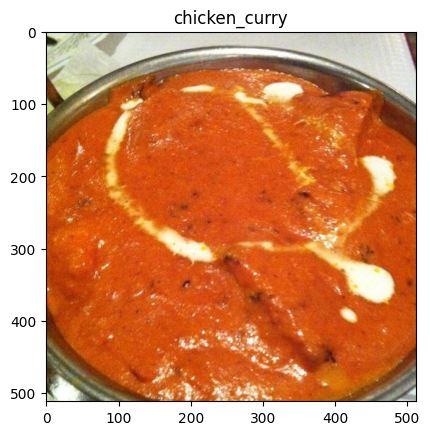

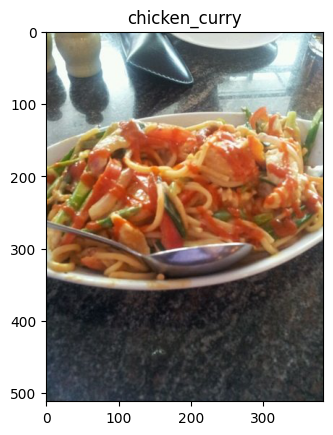

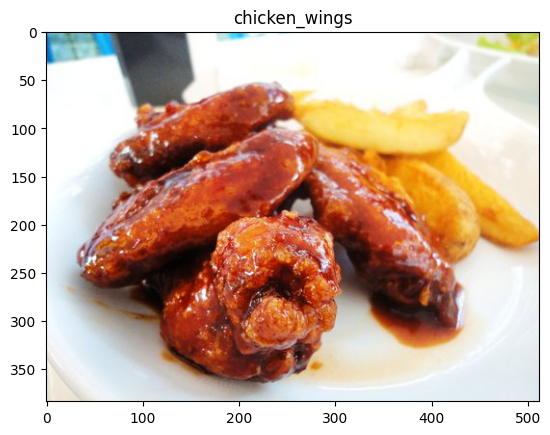

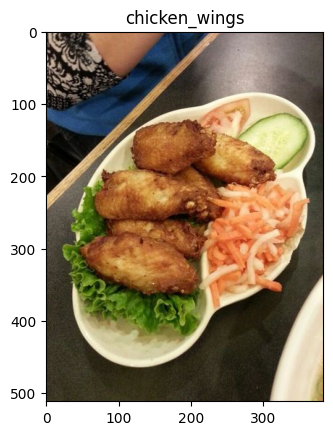

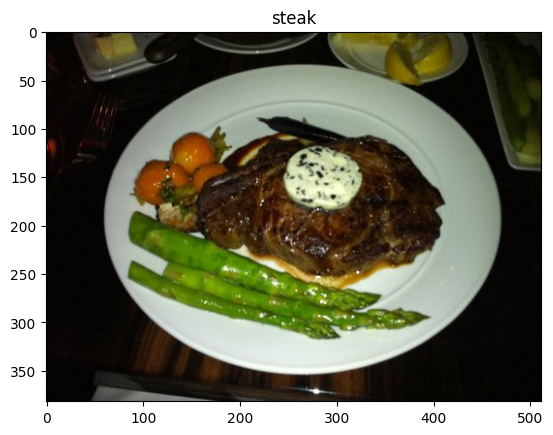

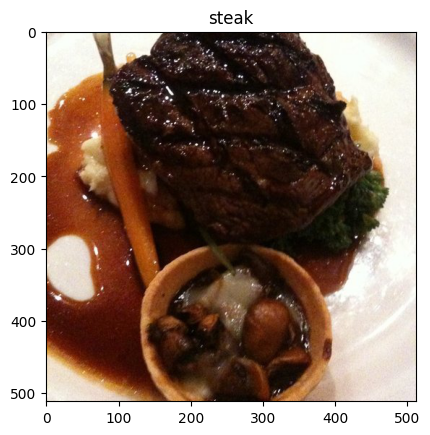

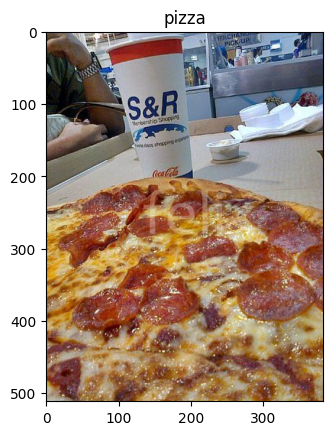

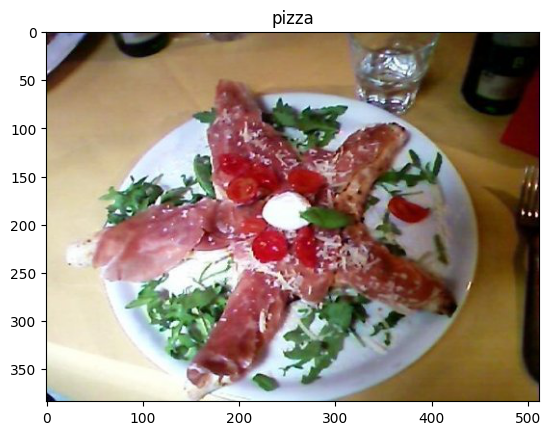

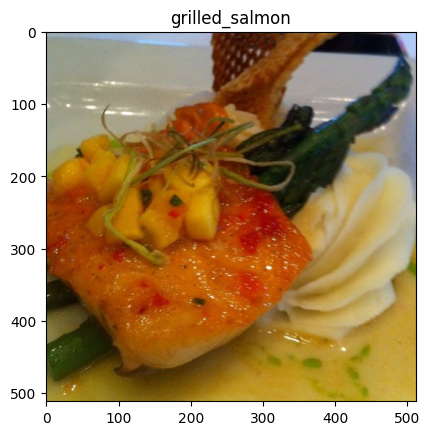

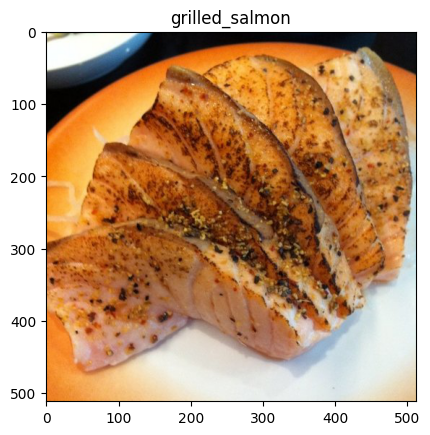

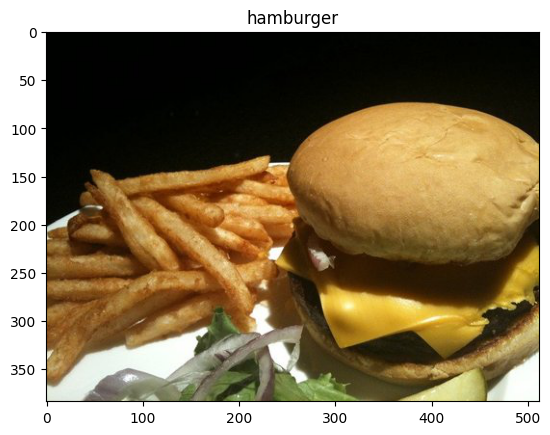

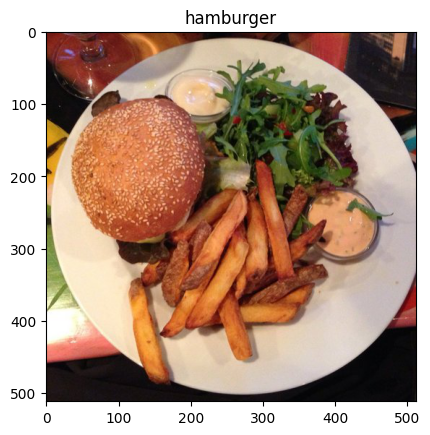

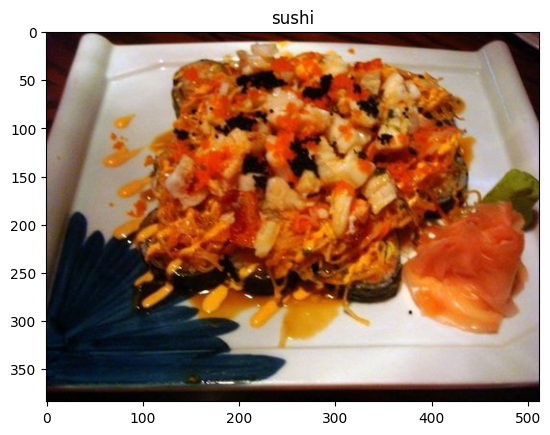

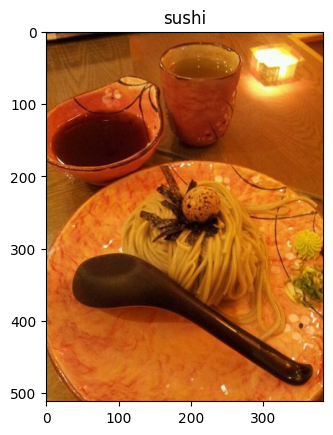

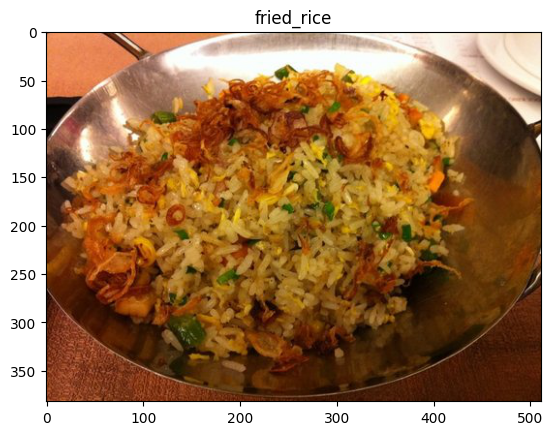

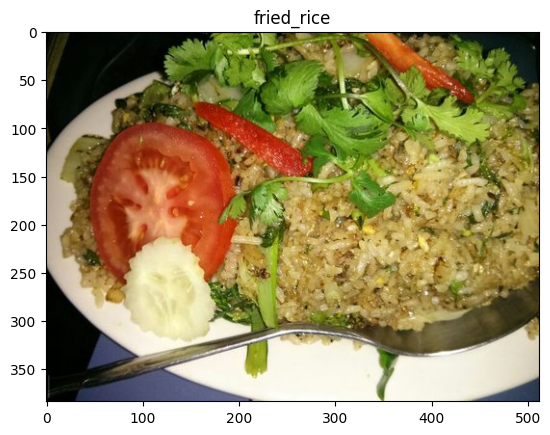

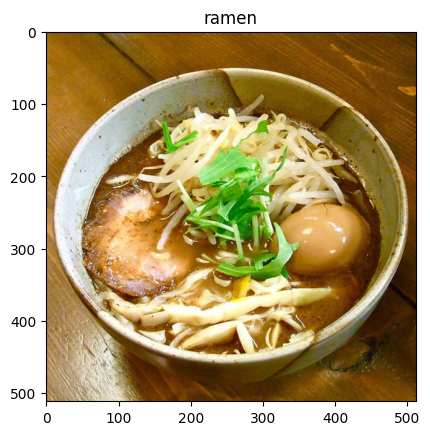

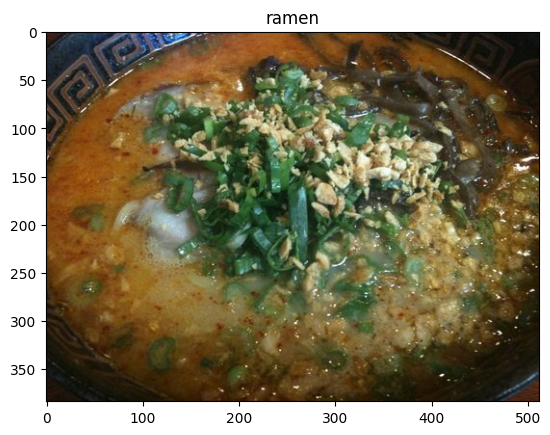

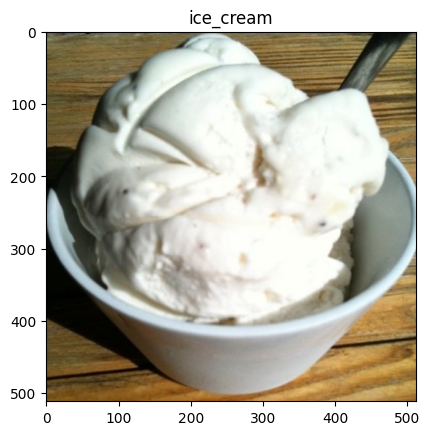

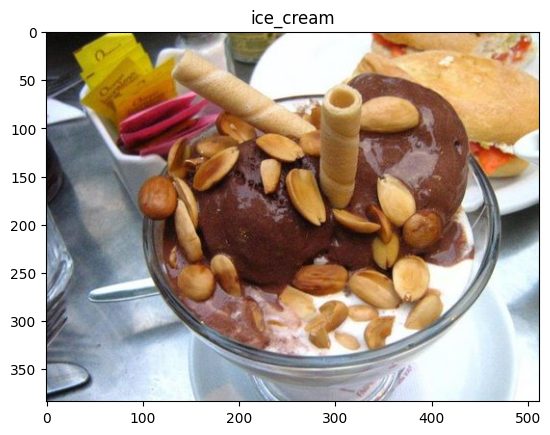

In [7]:
for i in class_names:
  pic=np.random.choice(os.listdir("/content/10_food_classes_all_data/train/"+i),2)
  for j in pic:
    pth="/content/10_food_classes_all_data/train/"+i+"/"+j
    img=mpimg.imread(pth)
    plt.imshow(img)
    plt.title(i)
    plt.show()

Images are not in same shape.
<br> Images of same classes are also not in same shape.

### Image Preprocessing

1. Converting images to numbers.
2. Making all images to same shape.
3. Scaling the values of pixel

In [8]:
# importing required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# creating imagedatagenerator instance with scaling
train_data_scale=ImageDataGenerator(rescale=1/255)
test_data_scale=ImageDataGenerator(rescale=1/255)

In [10]:
#preprocessing image for model

train_data=train_data_scale.flow_from_directory("/content/10_food_classes_all_data/train",
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical")

test_data=train_data_scale.flow_from_directory("/content/10_food_classes_all_data/test",
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Model Building

In [11]:
baseline_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 50)                7526450   
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 7,529,510
Trainable params: 7,529,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compiling the model
baseline_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [14]:
# fitting the model
history_baseline= baseline_model.fit(train_data,
                        epochs=5,
                        validation_data=test_data,
                        )

Epoch 1/5
235/235 [==============================] - 63s 245ms/step - loss: 4.3222 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 53s 224ms/step - loss: 2.3029 - accuracy: 0.0956 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 49s 209ms/step - loss: 2.3028 - accuracy: 0.0919 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 49s 208ms/step - loss: 2.3028 - accuracy: 0.0955 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 2.3028 - accuracy: 0.0949 - val_loss: 2.3026 - val_accuracy: 0.1000


In [15]:
#Building the model
model= tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

In [17]:
# compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [19]:
# fitting the model
history_model= model.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        )

Epoch 1/10
235/235 [==============================] - 51s 216ms/step - loss: 1.5979 - accuracy: 0.4535 - val_loss: 1.7468 - val_accuracy: 0.3980
Epoch 2/10
235/235 [==============================] - 65s 279ms/step - loss: 1.5329 - accuracy: 0.4813 - val_loss: 1.7905 - val_accuracy: 0.3780
Epoch 3/10
235/235 [==============================] - 51s 215ms/step - loss: 1.4834 - accuracy: 0.4972 - val_loss: 1.8248 - val_accuracy: 0.3732
Epoch 4/10
235/235 [==============================] - 49s 211ms/step - loss: 1.4219 - accuracy: 0.5217 - val_loss: 1.7636 - val_accuracy: 0.3984
Epoch 5/10
235/235 [==============================] - 60s 255ms/step - loss: 1.3712 - accuracy: 0.5395 - val_loss: 1.8185 - val_accuracy: 0.4052
Epoch 6/10
235/235 [==============================] - 60s 255ms/step - loss: 1.3256 - accuracy: 0.5540 - val_loss: 1.9133 - val_accuracy: 0.3896
Epoch 7/10
235/235 [==============================] - 60s 254ms/step - loss: 1.2788 - accuracy: 0.5641 - val_loss: 1.8914 - val_ac

The training accuracy is increasing but the validation accuracy is saturated.

The model is overfitting.
To overcome overfitting.
  * need more diverse data
  * reduce model complexity
  * make more data with given data

### Data Augmentation

In [23]:
model_aug=tf.keras.models.Sequential([tf.keras.layers.RandomFlip(),
                                     tf.keras.layers.RandomRotation((0.2,0.9))])

In [ ]:
#train_data_augment=tf.image.random_flip_left_right(train_data)

In [24]:
model_aug= tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    model_aug,
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="same"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [25]:
model_aug.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
history_model_aug= model_aug.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        )